In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/bbdd_kidney'

/content/drive/MyDrive/bbdd_kidney


In [ ]:
import pandas as pd
data = pd.read_csv('data_kidney.csv')
data

,idx,g_dif_corticomedular,g_cortical_hiperecogénica,label,les1,les2,les3,les4,les5,les6,les7,les8,les9,les10,les11,les12,sum lesions
0,I20181002081653000,0,0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,I20181002081653953,0,0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,I20181002081654546,1,1,pathological,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,I20181002081717812,0,0,pathological,quiste simple,quiste simple,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,I20181002081717968,0,0,pathological,quiste simple,quiste simple,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,I20181002081338984,0,0,pathological,hidronefrosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1981,I20181002081356218,0,0,pathological,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1982,I20181002081501906,0,0,pathological,quiste simple,quiste simple,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1983,I20181002081652609,0,0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
import os
from os import listdir
from os.path import isfile, join

images = {}
im2 = []

for root, dirs, files in os.walk('/content/drive/MyDrive/bbdd_kidney/images'):
   path = root.split(os.sep)
   for index, file in enumerate(files):
      im2 = [ f for f in listdir(root) if isfile(join(root,f)) ]
      images[index] = join(root,im2[index])

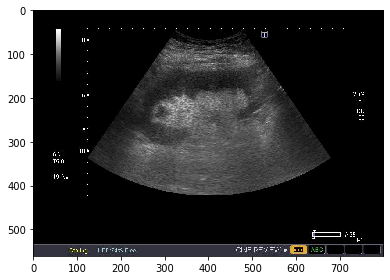

In [ ]:
import skimage
from skimage import io
img = io.imread(images[0])
io.imshow(img)

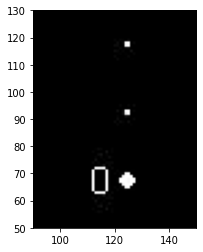

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.xlim(90 , 150)
plt.ylim(50,130)
plt.show()

In [ ]:
def crop_y(image , x1=90,x2=150,y1=50,y2=150):
  """
  Return the cropped image at the x1, x2, y1, y2 coordinates
  """
  return image[y1:y2 , x1:x2, :]

In [ ]:
def crop_x(image, x1=100,x2=250, y1=38,y2=48):
  """
  Return the cropped image at the x1, x2, y1, y2 coordinates
  """
  return image[y1:y2 , x1:x2, :]

In [ ]:
def crop_x2D(image, x1=100,x2=250, y1=38,y2=48):
  """
  Return the cropped image at the x1, x2, y1, y2 coordinates
  """
  return image[y1:y2 , x1:x2]

(561, 800, 3)


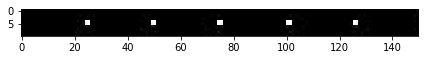

In [ ]:
import numpy as np
print(np.shape(img))
img_cropped = crop_x(img )#, 90,150,50,145)
io.imshow(img_cropped)

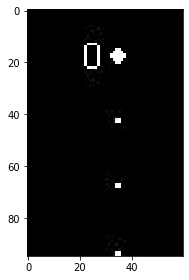

In [ ]:
img_cropped = crop_y(img , 90,150,50,145)
io.imshow(img_cropped)

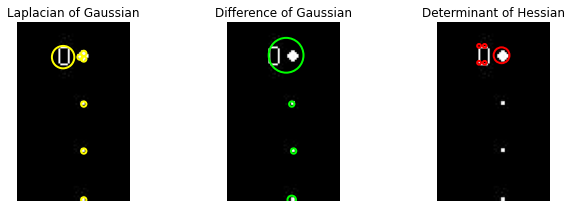

In [ ]:
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh

image_gray = skimage.color.rgb2gray(img_cropped)
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img_cropped)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

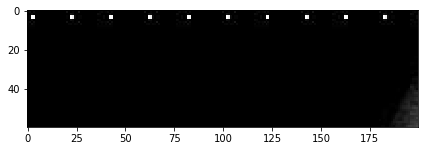

In [ ]:
#img = io.imread('/content/drive/MyDrive/bbdd_kidney/images/I20181002081653953.jpg')
img = io.imread(images[1000])
#img = io.imread(images[1340])
img_cropped = crop_x(img,100,300,0,60)
io.imshow(img_cropped)


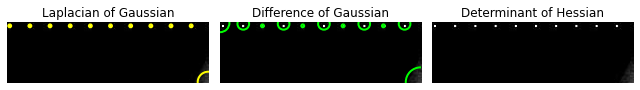

In [ ]:
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh

image_gray = skimage.color.rgb2gray(img_cropped)
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img_cropped)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
def find_points(image, laplacian=True):
	image_gray = skimage.color.rgb2gray(image)
	if laplacian == True:
		blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
		blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
		return blobs_log

	else:
		blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
		blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
		return blobs_dog

#img = io.imread(images[996])
img = io.imread('/content/drive/MyDrive/bbdd_kidney/images/I20181002082218296.jpg')


img = crop_x(img,y1=0)#y1=39,y2=48)


points = find_points(img,laplacian=True)

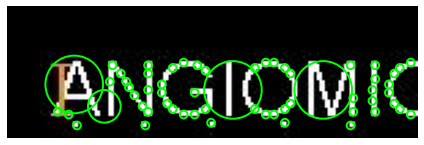

In [ ]:
fig, ax = plt.subplots()

ax.imshow(img)
for blob in points:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='lime', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
points

array([[ 23.        ,  72.        ,   1.41421356],
       [ 42.        , 101.        ,   1.41421356],
       [ 42.        ,  74.        ,   1.41421356],
       [ 43.        , 125.        ,   1.41421356],
       [ 37.        , 101.        ,   1.41421356],
       [ 22.        , 143.        ,   1.41421356],
       [ 35.        , 141.        ,   1.41421356],
       [ 37.        ,  90.        ,   1.41421356],
       [ 38.        , 134.        ,   1.41421356],
       [ 43.        ,  50.        ,   1.41421356],
       [ 22.        ,  60.        ,   1.41421356],
       [ 22.        , 101.        ,   1.41421356],
       [ 43.        ,  25.        ,   1.41421356],
       [ 38.        , 126.        ,   1.41421356],
       [ 21.        ,  51.        ,   1.41421356],
       [ 22.        ,  90.        ,   1.41421356],
       [ 24.        , 103.        ,   1.41421356],
       [ 37.        ,  60.        ,   1.41421356],
       [ 24.        , 141.        ,   1.41421356],
       [ 35.        ,  58.     

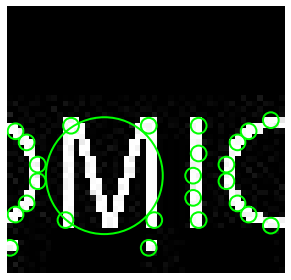

In [ ]:
#img = io.imread(images[1000])

img = crop_x(img,100,300,0,60)
points = find_points(img, laplacian = True)
fig, ax = plt.subplots()

ax.imshow(img)
for blob in points:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='lime', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
def crop_image(img):
  if len(np.shape(img)) == 3:
    img1 = crop_x(img,100,300,0,60)
  else:
    img1 = crop_x2D(img,100,300,0,60)
  points = find_points(img1,laplacian=False)
  for p in points:
    if p[2] <1.5:
      x = int(p[1])
      y = int(p[0])
      break
  try:
    if y <3:
      y=3
  except:
    img = second_crop(img)
    return img
  if x<49:
    x=50
  img = crop_x(img, x1=(x-10),x2=(x+130),y1=(y-2),y2=(y+2))
  return img

def second_crop(img):
  if len(np.shape(img)) == 3:
    img1 = crop_x(img,100,300,0,60)
  else:
    img1 = crop_x2D(img,100,300,0,60)
  points = find_points(img1,laplacian=True)
  for p in points:
    if p[2] <1.5:
      x = int(p[1])
      y = int(p[0])
      break
  try:
    if y <3:
      y=3
  except UnboundLocalError:
    img = crop_x(img,y1=0)
    return img
  if x<49:
    x=50
  img = crop_x(img, x1=(x-10),x2=(x+130),y1=(y-2),y2=(y+2))
  return img

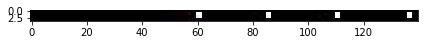

In [ ]:
#img = io.imread(images[1000])
img = io.imread('/content/drive/MyDrive/bbdd_kidney/images/I20181002082218296.jpg')

a = crop_image(img)
io.imshow(a)

In [ ]:
import cv2
def add_border(image, bt=5):
    image = skimage.color.rgb2gray(image)
    
    image_b = cv2.copyMakeBorder(image, bt, bt, bt, bt, cv2.BORDER_CONSTANT)
    
    return image_b


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


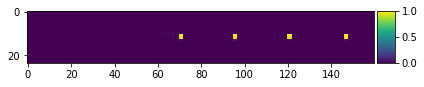

In [ ]:
b = add_border(a, bt=10)
io.imshow(b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


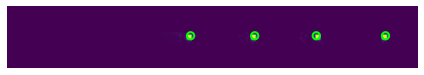

In [ ]:
points = find_points(b)
fig, ax = plt.subplots()

ax.imshow(b)
for blob in points:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='lime', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
def get_distance_x(points):
  all =[]
  for p in points:
    if p[2] < 1.5:
      all.append(p[1])
  all =np.sort(all)
  distances = [abs(all[i] - all[i+1]) for i in range(len(all)-1)]
  return distances

In [ ]:
d = get_distance_x(points)
print(d)
print(np.mean(d))

[39.0, 41.0, 39.0]
39.666666666666664


## Df

In [ ]:
names = []
for i in range(len(im2)):
  name, _= im2[i].split('.')
  names.append(name)
print(names)

['I20131113215623437', 'I20131113220027296', 'I20131113220030750', 'I20131113220104546', 'I20131113220104640', 'I20131113220104750', 'I20131113220104843', 'I20131113220104953', 'I20131113220105078', 'I20131113220105187', 'I20131113220151328', 'I20131113220202890', 'I20131113220438328', 'I20131113220438437', 'I20131113220438812', 'I20131113220812625', 'I20131113215316656', 'I20131113215634359', 'I20131113215634484', 'I20131113215723953', 'I20131113215724593', 'I20131113215724703', 'I20131113215858296', 'I20131113215858968', 'I20131113215859109', 'I20131113215859250', 'I20131113215859343', 'I20131113215859453', 'I20131113215900406', 'I20131113215900531', 'I20131113215930093', 'I20131113220109640', 'I20131113220109765', 'I20131113220110281', 'I20131113220110390', 'I20131113220207640', 'I20131113220207953', 'I20131113220208453', 'I20131113220208562', 'I20131113220208703', 'I20131113220713187', 'I20131113220725484', 'I20131113220725984', 'I20131113220726093', 'I20131113220947000', 'I2013111

In [ ]:
data['pixels_to_cm'] = 0
for i in range(len(images)):
  img = io.imread(images[i])
  img = crop_image(img)
  img = add_border(img)
  points = find_points(img)
  dist = np.mean(get_distance_x(points))
  data.loc[data['idx'] == images[i]]
  row = data.index[data['idx']==names[i]][0]
  data.loc[row, 'pixels_to_cm'] = dist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


In [ ]:
data

,idx,g_dif_corticomedular,g_cortical_hiperecogénica,label,les1,les2,les3,les4,les5,les6,les7,les8,les9,les10,les11,les12,sum lesions,pixels_to_cm
0,I20181002081653000,0.0,0.0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.000000
1,I20181002081653953,0.0,0.0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.000000
2,I20181002081654546,1.0,1.0,pathological,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,22.666667
3,I20181002081717812,0.0,0.0,pathological,quiste simple,quiste simple,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,32.000000
4,I20181002081717968,0.0,0.0,pathological,quiste simple,quiste simple,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,31.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,I20181002081356218,0.0,0.0,pathological,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,29.000000
1982,I20181002081501906,0.0,0.0,pathological,quiste simple,quiste simple,quiste simple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,27.200000
1983,I20181002081652609,0.0,0.0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.000000
1984,I20181002081652890,0.0,0.0,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.000000


In [ ]:
print(data['pixels_to_cm'].unique())

[20.         22.66666667 32.         31.         38.5        24.
 18.         32.25       25.25       13.2        21.2        23.8
 18.33333333 21.         28.66666667 27.2        38.         22.5
 29.25       22.25       39.66666667 25.4        29.         14.25
 17.14285714 19.2        34.         14.66666667 25.8        27.
 47.         18.2        25.5        13.         17.8        34.33333333
 17.         19.         18.8        15.75       42.5        29.75
 22.4        24.33333333 16.42857143 28.5        24.6        15.4
 22.2        31.66666667 18.14285714 16.         17.25       19.71428571
 23.4        25.33333333  9.92857143 19.5        37.         15.85714286
 14.5        24.5         8.86666667 22.33333333 18.83333333  9.85714286
 15.875       9.26666667  4.33333333 25.          2.5        15.25
 29.5         6.89473684 35.33333333  5.4        20.5        34.66666667
 17.28571429 37.5        19.16666667 13.16666667  5.66666667 36.
  9.76923077 23.5        10.69230769  6.6

In [ ]:
data.loc[data['idx'] == data.idx[42]]

,idx,g_dif_corticomedular,g_cortical_hiperecogénica,label,les1,les2,les3,les4,les5,les6,les7,les8,les9,les10,les11,les12,sum lesions,pixels_to_cm
42,Ectasia calicial,0.0,0.0,pathological,hidronefrosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,39.666667


In [ ]:
data['pixels_to_cm'].isna().sum()

0

In [ ]:
df = pd.DataFrame([[k,v.values]
                        for k,v in data.groupby('pixels_to_cm').groups.items()], 
                      columns=['pixels_to_cm','indices'])
df['pixels_to_cm'].unique()

array([ 0.        ,  2.5       ,  4.33333333,  5.4       ,  5.66666667,
        6.61538462,  6.89473684,  8.86666667,  9.26666667,  9.76923077,
        9.85714286,  9.92857143, 10.69230769, 13.        , 13.16666667,
       13.2       , 14.25      , 14.5       , 14.66666667, 15.25      ,
       15.4       , 15.75      , 15.85714286, 15.875     , 16.        ,
       16.42857143, 17.        , 17.14285714, 17.25      , 17.28571429,
       17.71428571, 17.8       , 18.        , 18.14285714, 18.2       ,
       18.33333333, 18.8       , 18.83333333, 19.        , 19.16666667,
       19.2       , 19.5       , 19.71428571, 20.        , 20.5       ,
       21.        , 21.2       , 22.2       , 22.25      , 22.33333333,
       22.4       , 22.5       , 22.66666667, 23.4       , 23.5       ,
       23.8       , 24.        , 24.33333333, 24.5       , 24.6       ,
       25.        , 25.25      , 25.33333333, 25.4       , 25.5       ,
       25.8       , 27.        , 27.2       , 28.5       , 28.66

In [ ]:
df.loc[df['pixels_to_cm'] >35]

,pixels_to_cm,indices
81,35.333333,[997]
82,36.000000,[1746]
83,37.000000,[756]
84,37.500000,[1107]
85,38.000000,"[32, 40]"
86,38.500000,"[5, 341, 528, 635, 754, 755, 757, 879]"
87,39.666667,[42]
88,42.500000,"[443, 856, 857, 980]"
89,47.000000,[133]


In [ ]:
data.idx[980]

'Hidronefrosis parВnquima normal4'

# Doesn't work:

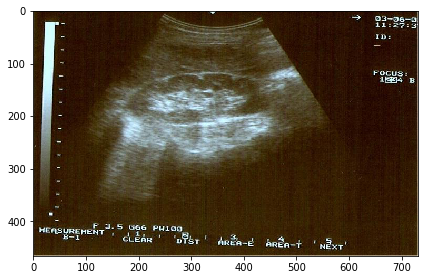

In [ ]:
#img = io.imread('/content/drive/MyDrive/bbdd_kidney/images/Litiasis caliz inferior.jpg')
#img = io.imread('/content/drive/MyDrive/bbdd_kidney/images/lobulaciвn fetal.jpg')
#img = io.imread('/content/drive/MyDrive/bbdd_kidney/images/Ecogenicidad normal1.jpg')
#img = io.imread('/content/drive/MyDrive/bbdd_kidney/images/Hidronefrosis parВnquima normal2.jpg')
img = io.imread('/content/drive/MyDrive/bbdd_kidney/images/lobulaciвn fetal.jpg')
io.imshow(img)

In [ ]:
data.loc[data['idx'] == 'lobulaciвn fetal']

,idx,g_dif_corticomedular,g_cortical_hiperecogénica,label,les1,les2,les3,les4,les5,les6,les7,les8,les9,les10,les11,les12,sum lesions,pixels_to_cm
973,lobulaciвn fetal,0.0,0.0,pathological,escara cortical,escara cortical,escara cortical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.5
